In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [303]:
#EDA

In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
## no null values are found

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Checking number of unique values in each columns
count = 1
for x in df:
    print(f'{count}. {x}: {df[x].nunique()}')
    print(f'{df[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. customerID: 7043
4785-FCIFB    1
6023-GSSXW    1
5201-USSQZ    1
1163-VIPRI    1
1407-DIGZV    1
             ..
9685-WKZGT    1
6579-JPICP    1
7450-NWRTR    1
1099-BTKWT    1
1098-KFQEC    1
Name: customerID, Length: 7043, dtype: int64
----------

2. gender: 2
Male      3555
Female    3488
Name: gender, dtype: int64
----------

3. SeniorCitizen: 2
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----------

4. Partner: 2
No     3641
Yes    3402
Name: Partner, dtype: int64
----------

5. Dependents: 2
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------

6. tenure: 73
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
----------

7. PhoneService: 2
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------

8. MultipleLines: 3
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------

9. InternetSe

In [10]:
## exploring the continuos variables variables

In [11]:
cont_data = df.select_dtypes(exclude = ['object'] )
cont_data

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [ ]:
## plotting the histogram

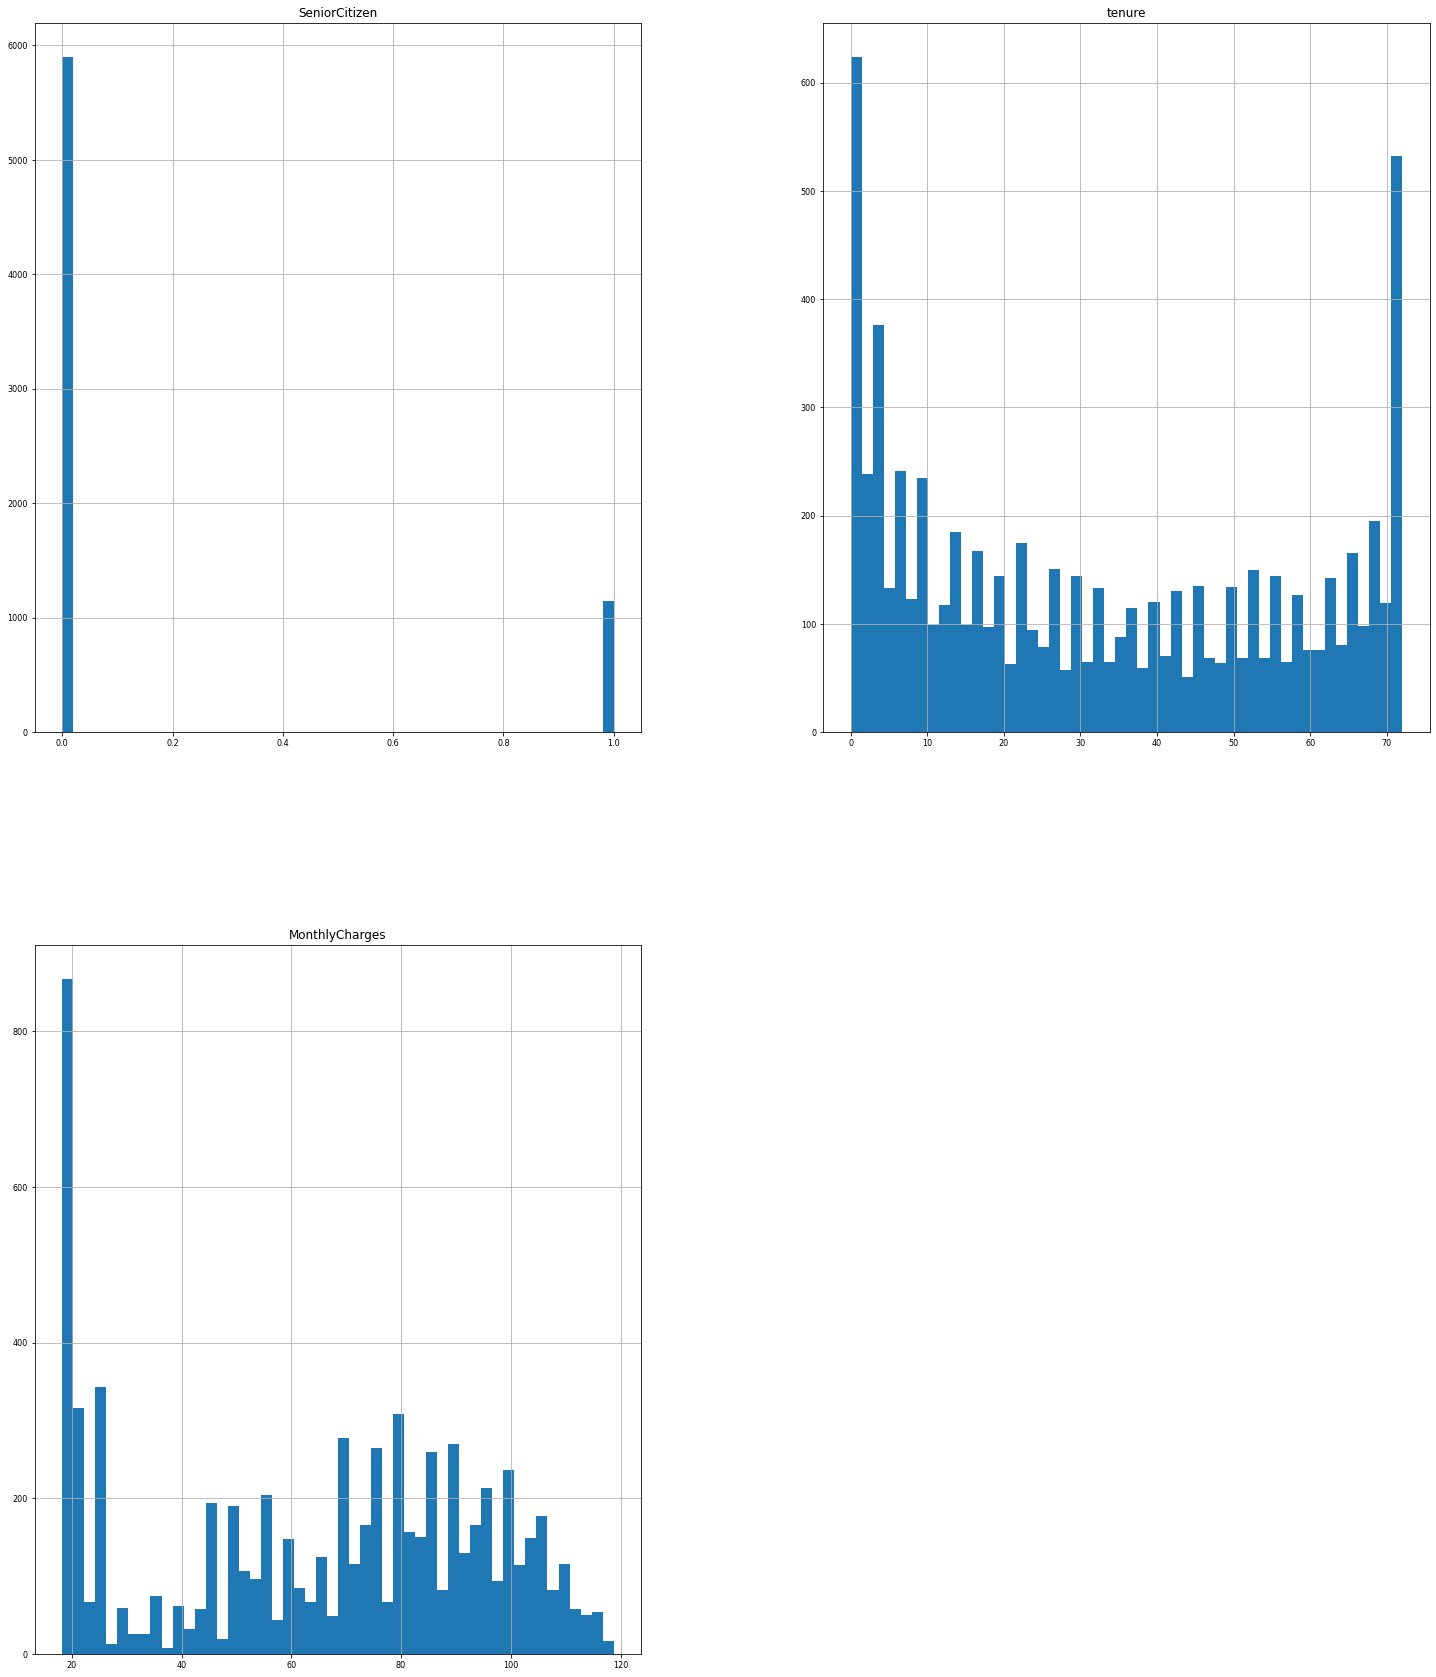

In [12]:
cont_data.hist(figsize = (25, 30), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

In [13]:
cont_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

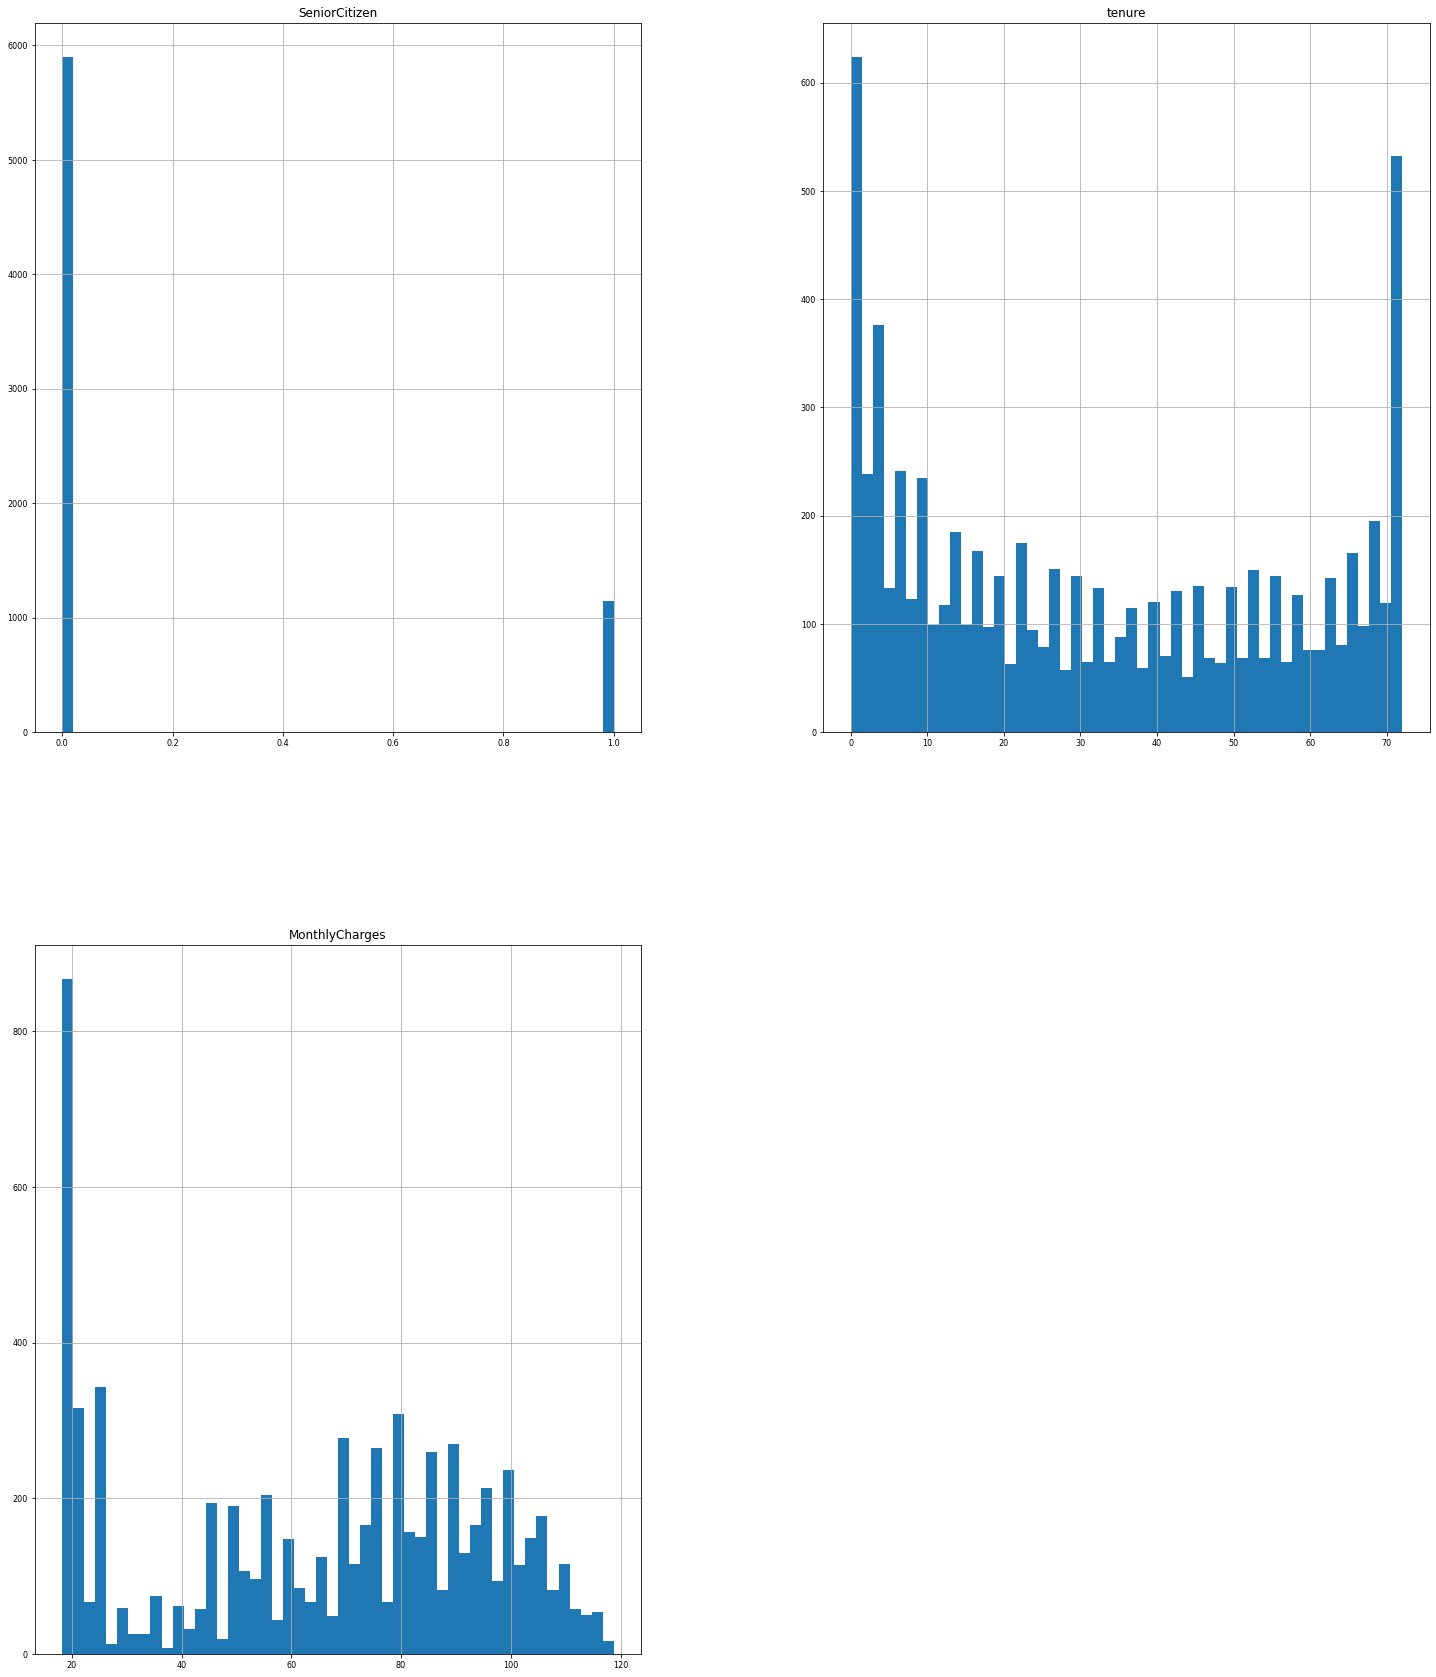

In [14]:
cont_data.hist(figsize = (25, 30), bins = 50, xlabelsize = 8, ylabelsize = 8)

In [ ]:
## barplot

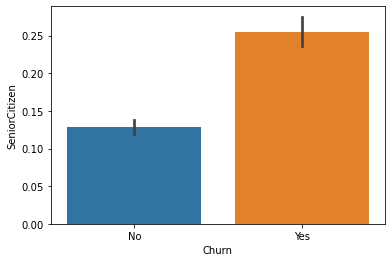

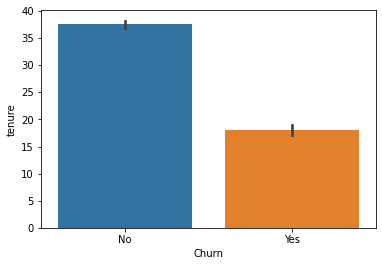

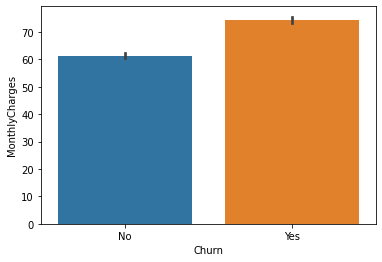

In [17]:
for i in cont_data:
    sns.barplot(y = cont_data[i], x = df['Churn'])
    plt.show()

In [ ]:
## boxplot

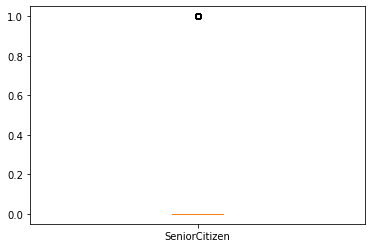

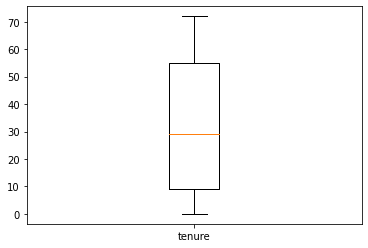

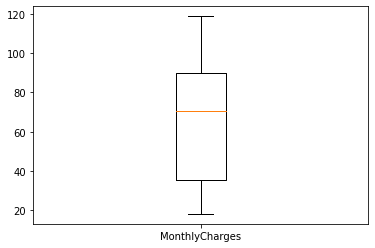

In [18]:
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

In [19]:
## no outliers

In [20]:
## checking for correlation

In [22]:
corr=cont_data.corr()

<AxesSubplot:>

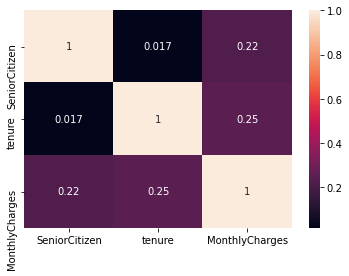

In [23]:
sns.heatmap(corr,annot=True)

In [24]:
## not much correlation is found

In [26]:
## exploring the categorical variables

In [27]:
cat_vars = df.select_dtypes(include = ['object'])
cat_vars

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [29]:
# Checking number of unique values in each columns
count = 1
for x in cat_vars:
    print(f'{count}. {x}: {cat_vars[x].nunique()}')
    print(f'{cat_vars[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. customerID: 7043
4785-FCIFB    1
6023-GSSXW    1
5201-USSQZ    1
1163-VIPRI    1
1407-DIGZV    1
             ..
9685-WKZGT    1
6579-JPICP    1
7450-NWRTR    1
1099-BTKWT    1
1098-KFQEC    1
Name: customerID, Length: 7043, dtype: int64
----------

2. gender: 2
Male      3555
Female    3488
Name: gender, dtype: int64
----------

3. Partner: 2
No     3641
Yes    3402
Name: Partner, dtype: int64
----------

4. Dependents: 2
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------

5. PhoneService: 2
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------

6. MultipleLines: 3
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------

7. InternetService: 3
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------

8. OnlineSecurity: 3
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
----

In [28]:
## dropping the unnecessary columns

In [35]:
z=cat_vars.drop(['customerID','gender','Contract','PaperlessBilling','PaymentMethod','Dependents','TotalCharges'],axis=1)
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
7040,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,No
7041,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes


In [36]:
# Checking number of unique values in each columns
count = 1
for x in z:
    print(f'{count}. {x}: {z[x].nunique()}')
    print(f'{z[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. Partner: 2
No     3641
Yes    3402
Name: Partner, dtype: int64
----------

2. PhoneService: 2
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------

3. MultipleLines: 3
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------

4. InternetService: 3
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------

5. OnlineSecurity: 3
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
----------

6. OnlineBackup: 3
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
----------

7. DeviceProtection: 3
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
----------

8. TechSupport: 3
No                     3473
Yes                    2044
No internet service    1526
Name:

In [ ]:
##categorical to continuous

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
lb=LabelEncoder()

In [40]:
e=lb.fit_transform(z['Partner'])

In [41]:
pd.Series(e)

0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Length: 7043, dtype: int32

In [42]:
z['Partner']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,0,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,0,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,No
7039,1,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
7040,1,No,No phone service,DSL,Yes,No,No,No,No,No,No
7041,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes


In [44]:
e=lb.fit_transform(z['PhoneService'])
pd.Series(e)
z['PhoneService']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,No phone service,DSL,No,Yes,No,No,No,No,No,0
1,0,1,No,DSL,Yes,No,Yes,No,No,No,No,1
2,0,1,No,DSL,Yes,Yes,No,No,No,No,Yes,1
3,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,0
4,0,1,No,Fiber optic,No,No,No,No,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,No,1
7039,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No,1
7040,1,0,No phone service,DSL,Yes,No,No,No,No,No,No,0
7041,1,1,Yes,Fiber optic,No,No,No,No,No,No,Yes,1


In [45]:
e=lb.fit_transform(z['MultipleLines'])
pd.Series(e)
z['MultipleLines']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,DSL,No,Yes,No,No,No,No,No,0
1,0,1,0,DSL,Yes,No,Yes,No,No,No,No,1
2,0,1,0,DSL,Yes,Yes,No,No,No,No,Yes,1
3,0,0,1,DSL,Yes,No,Yes,Yes,No,No,No,0
4,0,1,0,Fiber optic,No,No,No,No,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,DSL,Yes,No,Yes,Yes,Yes,Yes,No,1
7039,1,1,2,Fiber optic,No,Yes,Yes,No,Yes,Yes,No,1
7040,1,0,1,DSL,Yes,No,No,No,No,No,No,0
7041,1,1,2,Fiber optic,No,No,No,No,No,No,Yes,1


In [46]:
e=lb.fit_transform(z['InternetService'])
pd.Series(e)
z['InternetService']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,No,Yes,No,No,No,No,No,0
1,0,1,0,0,Yes,No,Yes,No,No,No,No,1
2,0,1,0,0,Yes,Yes,No,No,No,No,Yes,1
3,0,0,1,0,Yes,No,Yes,Yes,No,No,No,0
4,0,1,0,1,No,No,No,No,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,Yes,No,Yes,Yes,Yes,Yes,No,1
7039,1,1,2,1,No,Yes,Yes,No,Yes,Yes,No,1
7040,1,0,1,0,Yes,No,No,No,No,No,No,0
7041,1,1,2,1,No,No,No,No,No,No,Yes,1


In [47]:
e=lb.fit_transform(z['OnlineSecurity'])
pd.Series(e)
z['OnlineSecurity']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,0,Yes,No,No,No,No,No,0
1,0,1,0,0,2,No,Yes,No,No,No,No,1
2,0,1,0,0,2,Yes,No,No,No,No,Yes,1
3,0,0,1,0,2,No,Yes,Yes,No,No,No,0
4,0,1,0,1,0,No,No,No,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,No,Yes,Yes,Yes,Yes,No,1
7039,1,1,2,1,0,Yes,Yes,No,Yes,Yes,No,1
7040,1,0,1,0,2,No,No,No,No,No,No,0
7041,1,1,2,1,0,No,No,No,No,No,Yes,1


In [48]:
e=lb.fit_transform(z['OnlineBackup'])
pd.Series(e)
z['OnlineBackup']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,0,2,No,No,No,No,No,0
1,0,1,0,0,2,0,Yes,No,No,No,No,1
2,0,1,0,0,2,2,No,No,No,No,Yes,1
3,0,0,1,0,2,0,Yes,Yes,No,No,No,0
4,0,1,0,1,0,0,No,No,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,Yes,Yes,Yes,Yes,No,1
7039,1,1,2,1,0,2,Yes,No,Yes,Yes,No,1
7040,1,0,1,0,2,0,No,No,No,No,No,0
7041,1,1,2,1,0,0,No,No,No,No,Yes,1


In [49]:
e=lb.fit_transform(z['DeviceProtection'])
pd.Series(e)
z['DeviceProtection']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,0,2,0,No,No,No,No,0
1,0,1,0,0,2,0,2,No,No,No,No,1
2,0,1,0,0,2,2,0,No,No,No,Yes,1
3,0,0,1,0,2,0,2,Yes,No,No,No,0
4,0,1,0,1,0,0,0,No,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,Yes,Yes,Yes,No,1
7039,1,1,2,1,0,2,2,No,Yes,Yes,No,1
7040,1,0,1,0,2,0,0,No,No,No,No,0
7041,1,1,2,1,0,0,0,No,No,No,Yes,1


In [50]:
e=lb.fit_transform(z['TechSupport'])
pd.Series(e)
z['TechSupport']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,0,2,0,0,No,No,No,0
1,0,1,0,0,2,0,2,0,No,No,No,1
2,0,1,0,0,2,2,0,0,No,No,Yes,1
3,0,0,1,0,2,0,2,2,No,No,No,0
4,0,1,0,1,0,0,0,0,No,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,2,Yes,Yes,No,1
7039,1,1,2,1,0,2,2,0,Yes,Yes,No,1
7040,1,0,1,0,2,0,0,0,No,No,No,0
7041,1,1,2,1,0,0,0,0,No,No,Yes,1


In [51]:
e=lb.fit_transform(z['StreamingTV'])
pd.Series(e)
z['StreamingTV']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,0,2,0,0,0,No,No,0
1,0,1,0,0,2,0,2,0,0,No,No,1
2,0,1,0,0,2,2,0,0,0,No,Yes,1
3,0,0,1,0,2,0,2,2,0,No,No,0
4,0,1,0,1,0,0,0,0,0,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,2,2,Yes,No,1
7039,1,1,2,1,0,2,2,0,2,Yes,No,1
7040,1,0,1,0,2,0,0,0,0,No,No,0
7041,1,1,2,1,0,0,0,0,0,No,Yes,1


In [52]:
e=lb.fit_transform(z['StreamingMovies'])
pd.Series(e)
z['StreamingMovies']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,0,2,0,0,0,0,No,0
1,0,1,0,0,2,0,2,0,0,0,No,1
2,0,1,0,0,2,2,0,0,0,0,Yes,1
3,0,0,1,0,2,0,2,2,0,0,No,0
4,0,1,0,1,0,0,0,0,0,0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,2,2,2,No,1
7039,1,1,2,1,0,2,2,0,2,2,No,1
7040,1,0,1,0,2,0,0,0,0,0,No,0
7041,1,1,2,1,0,0,0,0,0,0,Yes,1


In [53]:
e=lb.fit_transform(z['Churn'])
pd.Series(e)
z['Churn']=e
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,0,2,0,0,0,0,0,0
1,0,1,0,0,2,0,2,0,0,0,0,1
2,0,1,0,0,2,2,0,0,0,0,1,1
3,0,0,1,0,2,0,2,2,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,2,2,2,0,1
7039,1,1,2,1,0,2,2,0,2,2,0,1
7040,1,0,1,0,2,0,0,0,0,0,0,0
7041,1,1,2,1,0,0,0,0,0,0,1,1


In [54]:
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,name
0,1,0,1,0,0,2,0,0,0,0,0,0
1,0,1,0,0,2,0,2,0,0,0,0,1
2,0,1,0,0,2,2,0,0,0,0,1,1
3,0,0,1,0,2,0,2,2,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,2,2,2,0,1
7039,1,1,2,1,0,2,2,0,2,2,0,1
7040,1,0,1,0,2,0,0,0,0,0,0,0
7041,1,1,2,1,0,0,0,0,0,0,1,1


In [55]:
z=z.drop(['name'],axis=1)
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,0,1,0,0,2,0,0,0,0,0
1,0,1,0,0,2,0,2,0,0,0,0
2,0,1,0,0,2,2,0,0,0,0,1
3,0,0,1,0,2,0,2,2,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,2,2,2,0
7039,1,1,2,1,0,2,2,0,2,2,0
7040,1,0,1,0,2,0,0,0,0,0,0
7041,1,1,2,1,0,0,0,0,0,0,1


In [56]:
z

,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,0,1,0,0,2,0,0,0,0,0
1,0,1,0,0,2,0,2,0,0,0,0
2,0,1,0,0,2,2,0,0,0,0,1
3,0,0,1,0,2,0,2,2,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,2,2,2,0
7039,1,1,2,1,0,2,2,0,2,2,0
7040,1,0,1,0,2,0,0,0,0,0,0
7041,1,1,2,1,0,0,0,0,0,0,1


In [ ]:
## concatenating the two data frames

In [57]:
final_data = pd.concat([cont_data, z], axis = 1)
final_data

,SeniorCitizen,tenure,MonthlyCharges,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,1,29.85,1,0,1,0,0,2,0,0,0,0,0
1,0,34,56.95,0,1,0,0,2,0,2,0,0,0,0
2,0,2,53.85,0,1,0,0,2,2,0,0,0,0,1
3,0,45,42.30,0,0,1,0,2,0,2,2,0,0,0
4,0,2,70.70,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,2,0,2,0,2,2,2,2,0
7039,0,72,103.20,1,1,2,1,0,2,2,0,2,2,0
7040,0,11,29.60,1,0,1,0,2,0,0,0,0,0,0
7041,1,4,74.40,1,1,2,1,0,0,0,0,0,0,1


In [58]:
final_data

,SeniorCitizen,tenure,MonthlyCharges,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,1,29.85,1,0,1,0,0,2,0,0,0,0,0
1,0,34,56.95,0,1,0,0,2,0,2,0,0,0,0
2,0,2,53.85,0,1,0,0,2,2,0,0,0,0,1
3,0,45,42.30,0,0,1,0,2,0,2,2,0,0,0
4,0,2,70.70,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,2,0,2,0,2,2,2,2,0
7039,0,72,103.20,1,1,2,1,0,2,2,0,2,2,0
7040,0,11,29.60,1,0,1,0,2,0,0,0,0,0,0
7041,1,4,74.40,1,1,2,1,0,0,0,0,0,0,1


In [59]:
## checking for correlation

In [62]:
corr=final_data.corr()

In [65]:
plt.figure(figsize=(25,20))

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

<AxesSubplot:>

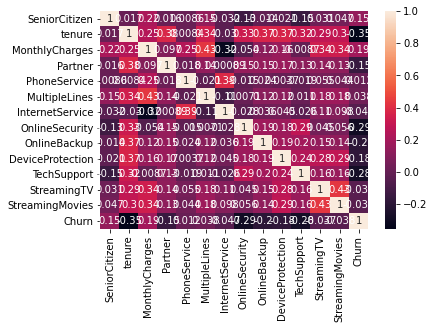

In [66]:
sns.heatmap(corr,annot=True)

In [67]:
x=final_data.drop(['Churn'],axis=1)
x

,SeniorCitizen,tenure,MonthlyCharges,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,29.85,1,0,1,0,0,2,0,0,0,0
1,0,34,56.95,0,1,0,0,2,0,2,0,0,0
2,0,2,53.85,0,1,0,0,2,2,0,0,0,0
3,0,45,42.30,0,0,1,0,2,0,2,2,0,0
4,0,2,70.70,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,2,0,2,0,2,2,2,2
7039,0,72,103.20,1,1,2,1,0,2,2,0,2,2
7040,0,11,29.60,1,0,1,0,2,0,0,0,0,0
7041,1,4,74.40,1,1,2,1,0,0,0,0,0,0


In [68]:
y=final_data['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [ ]:
## Standard Normalization

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
st=StandardScaler()

In [207]:
st.fit_transform(x)

array([[-0.43991649, -1.27744458, -1.16032292, ..., -0.92526212,
        -1.11349541, -1.12140513],
       [-0.43991649,  0.06632742, -0.25962894, ..., -0.92526212,
        -1.11349541, -1.12140513],
       [-0.43991649, -1.23672422, -0.36266036, ..., -0.92526212,
        -1.11349541, -1.12140513],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , ..., -0.92526212,
        -1.11349541, -1.12140513],
       [ 2.27315869, -1.15528349,  0.32033821, ..., -0.92526212,
        -1.11349541, -1.12140513],
       [-0.43991649,  1.36937906,  1.35896134, ...,  1.39629866,
         1.14654729,  1.1384107 ]])

In [208]:
## training the model

In [209]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)

In [211]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [212]:
kn=KNeighborsClassifier()

In [213]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [214]:
y_pred=kn.predict(x_test)

In [215]:
accuracy_score(y_test,y_pred)

0.7643161381921438

In [216]:
confusion_matrix(y_test,y_pred)

array([[1351,  203],
       [ 295,  264]], dtype=int64)

In [217]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.87      0.84      1554\n           1       0.57      0.47      0.51       559\n\n    accuracy                           0.76      2113\n   macro avg       0.69      0.67      0.68      2113\nweighted avg       0.75      0.76      0.76      2113\n'

In [218]:
roc_auc_score(y_test,y_pred)

0.6708206417508743

In [219]:
cross_val_score(kn,x,y,cv=10).mean()

0.7725382817537073

In [220]:
##SVC

In [221]:
sv=SVC()

In [222]:
sv.fit(x_train,y_train)

SVC()

In [223]:
y_pred=sv.predict(x_test)

In [224]:
accuracy_score(y_test,y_pred)

0.7818267865593942

In [225]:
confusion_matrix(y_test,y_pred)

array([[1428,  126],
       [ 335,  224]], dtype=int64)

In [226]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.92      0.86      1554\n           1       0.64      0.40      0.49       559\n\n    accuracy                           0.78      2113\n   macro avg       0.72      0.66      0.68      2113\nweighted avg       0.77      0.78      0.76      2113\n'

In [227]:
roc_auc_score(y_test,y_pred)

0.65981724121259

In [228]:
cross_val_score(sv,x,y,cv=10).mean()

0.7898605738233397

In [229]:
## DecisionTreeClassifier

In [230]:
dt=DecisionTreeClassifier()

In [231]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [232]:
y_pred=dt.predict(x_test)

In [233]:
accuracy_score(y_test,y_pred)

0.7198296261239944

In [234]:
confusion_matrix(y_test,y_pred)

array([[1247,  307],
       [ 285,  274]], dtype=int64)

In [235]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81      1554\n           1       0.47      0.49      0.48       559\n\n    accuracy                           0.72      2113\n   macro avg       0.64      0.65      0.64      2113\nweighted avg       0.72      0.72      0.72      2113\n'

In [236]:
roc_auc_score(y_test,y_pred)

0.6463031521171055

In [237]:
cross_val_score(dt,x,y,cv=10).mean()

0.7303681092843327

In [238]:
## RandomForestClassifier

In [239]:
rf=RandomForestClassifier()

In [240]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [241]:
y_pred=rf.predict(x_test)

In [242]:
accuracy_score(y_test,y_pred)

0.7714150496923805

In [243]:
confusion_matrix(y_test,y_pred)

array([[1364,  190],
       [ 293,  266]], dtype=int64)

In [244]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85      1554\n           1       0.58      0.48      0.52       559\n\n    accuracy                           0.77      2113\n   macro avg       0.70      0.68      0.69      2113\nweighted avg       0.76      0.77      0.76      2113\n'

In [245]:
roc_auc_score(y_test,y_pred)

0.6767923046992814

In [246]:
cross_val_score(rf,x,y,cv=10).mean()

0.7759459622823985

In [247]:
## gradientBoostingClassifier

In [248]:
gd=GradientBoostingClassifier()

In [254]:
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [255]:
y_pred=gd.predict(x_test)

In [256]:
accuracy_score(y_test,y_pred)

0.7941315664931378

In [257]:
confusion_matrix(y_test,y_pred)

array([[1414,  140],
       [ 295,  264]], dtype=int64)

In [258]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.91      0.87      1554\n           1       0.65      0.47      0.55       559\n\n    accuracy                           0.79      2113\n   macro avg       0.74      0.69      0.71      2113\nweighted avg       0.78      0.79      0.78      2113\n'

In [259]:
roc_auc_score(y_test,y_pred)

0.6910909120211446

In [260]:
cross_val_score(gd,x,y,cv=10).mean()

0.7993735896196003

In [261]:
## ada boost classifier

In [262]:
ad=AdaBoostClassifier()

In [263]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [264]:
y_pred=ad.predict(x_test)

In [265]:
accuracy_score(y_test,y_pred)

0.7946048272598202

In [266]:
confusion_matrix(y_test,y_pred)

array([[1404,  150],
       [ 284,  275]], dtype=int64)

In [267]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.87      1554\n           1       0.65      0.49      0.56       559\n\n    accuracy                           0.79      2113\n   macro avg       0.74      0.70      0.71      2113\nweighted avg       0.78      0.79      0.78      2113\n'

In [270]:
cross_val_score(ad,x,y,cv=10).mean()

0.7968189877498387

In [268]:
roc_auc_score(y_test,y_pred)

0.6977124070147326

In [269]:
from sklearn.metrics import roc_curve,roc_auc_score

In [143]:
cross_val_score(gd,x,y,cv=10).mean()

0.7993735896196003

In [144]:
roc_curve(y_test,y_pred)

(array([0.       , 0.0965251, 1.       ]),
 array([0.        , 0.49194991, 1.        ]),
 array([2, 1, 0]))

In [275]:
## out of all the classifiers GradientboostingClassifier is working better

In [276]:
## HYPER PARAMETER TUNING

In [277]:
from sklearn.model_selection import RandomizedSearchCV

In [278]:
params={'max_depth':range(4,12,2),'learning_rate':np.arange(0.1,1,0.1),'min_samples_split':range(4,8,2)}

In [279]:
g=RandomizedSearchCV(gd,params)

In [280]:
g.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': range(4, 12, 2),
                                        'min_samples_split': range(4, 8, 2)})

In [281]:
g.best_params_

{'min_samples_split': 6, 'max_depth': 4, 'learning_rate': 0.2}

In [282]:
gd_=GradientBoostingClassifier(max_depth=4,learning_rate=0.2,min_samples_split=6)

In [283]:
gd_.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_split=6)

In [284]:
y_pred=gd_.predict(x_test)

In [286]:
accuracy_score(y_test,y_pred)

0.7813535257927118

In [287]:
confusion_matrix(y_test,y_pred)

array([[1384,  170],
       [ 292,  267]], dtype=int64)

In [288]:
roc_auc_score(y_test,y_pred)

0.6841217655171145

In [289]:
cross_val_score(gd_,x,y,cv=10).mean()

0.790146478078659

In [290]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86      1554\n           1       0.61      0.48      0.54       559\n\n    accuracy                           0.78      2113\n   macro avg       0.72      0.68      0.70      2113\nweighted avg       0.77      0.78      0.77      2113\n'

In [291]:
## finalizing the above model

In [292]:
##evaluating the model

In [295]:
a=np.array(y_test)

In [296]:
pred=np.array(gd_.predict(x_test))

In [297]:
df_con=pd.DataFrame({'true':a,'pred':pred},index=range(len(a)))

In [298]:
df_con

,true,pred
0,0,0
1,1,0
2,1,0
3,0,0
4,1,1
...,...,...
2108,1,0
2109,0,0
2110,0,0
2111,0,0


In [299]:
## saving the model

In [300]:
import pickle

In [301]:
filename='TELECOM_CHURN_ANALYSIS'

In [302]:
pickle.dump(gd_,open(filename,'wb'))